In [8]:
library(tidyverse)
library(pheatmap)
library(grid)

print(sessionInfo())


R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.3 LTS

Matrix products: default
BLAS/LAPACK: /data/vihani/anaconda3/envs/jupyter/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] pheatmap_1.0.12 forcats_0.5.1   stringr_1.4.0   dplyr_1.0.7    
 [5] purrr_0.3.4     readr_2.0.1     tidyr_1.1.3     tibble_3.1.4   
 [9] ggplot2_3.3.5   tidyverse_1.3.1

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-5       tidyselect_1.1.1   repr_1.1.3         haven_2.4

In [9]:
odor_responses <- t(read.delim("./compiled_desc_resp/compiled_odor_sigResp_wide.csv", sep=',', header=T, row.names = 1))
odor_responses <- odor_responses[,order(colnames(odor_responses))]
odor_responses <- scale(odor_responses, center=TRUE, scale = TRUE)

In [10]:
cid_odorname_df <- read.delim("./cid_info/cid_odornames.csv", header=T, sep=',', row.names = 1)
row.names(cid_odorname_df) <- cid_odorname_df$odor_list

odor_responses <- odor_responses[,as.character(cid_odorname_df$cid)]
colnames(odor_responses) <- cid_odorname_df$odor_list

low_odor_info <- cid_odorname_df %>%
    select(category)
colnames(low_odor_info) <- "Odor category"
row.names(low_odor_info) <- as.character(cid_odorname_df$odor_list)

In [11]:
draw_colnames_180 <- function (coln, gaps, ...) {
  coord <- pheatmap:::find_coordinates(length(coln), gaps)
  x     <- coord$coord - 0.5 * coord$size
  res   <- grid::textGrob(
    coln, x = x, y = unit(1, "npc") - unit(3,"bigpts"),
    vjust = 0.75, hjust = 1, rot = 90, gp = grid::gpar(...)
  )
  return(res)
}
assignInNamespace(
  x = "draw_colnames",
  value = "draw_colnames_180",
  ns = asNamespace("pheatmap")
)




In [12]:
anno_layer <- cid_odorname_df %>%
    select(odor_list, category)
row.names(anno_layer) <- colnames(odor_responses)
anno_layer <- anno_layer %>%
    select(category)
colnames(anno_layer) <- "Odor category"

perceptually_distinct_colors <- c('#E6194B','#3CB44B','#FFE119','#4363D8','#F58231',
                                  '#911EB4','#42D4F4','#F032E6','#BFEF45','#000075')
names(perceptually_distinct_colors) <- unique(cid_odorname_df$category)
mycolors <- list("Odor category" = perceptually_distinct_colors)

Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on '1% β-Damascone' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on '1% β-Damascone' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on '1% β-Ionone' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on '1% β-Ionone' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on '100% (E)-β-farnesene' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on '100% (E)-β-farnesene' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in strwidth(t, units = "in", c

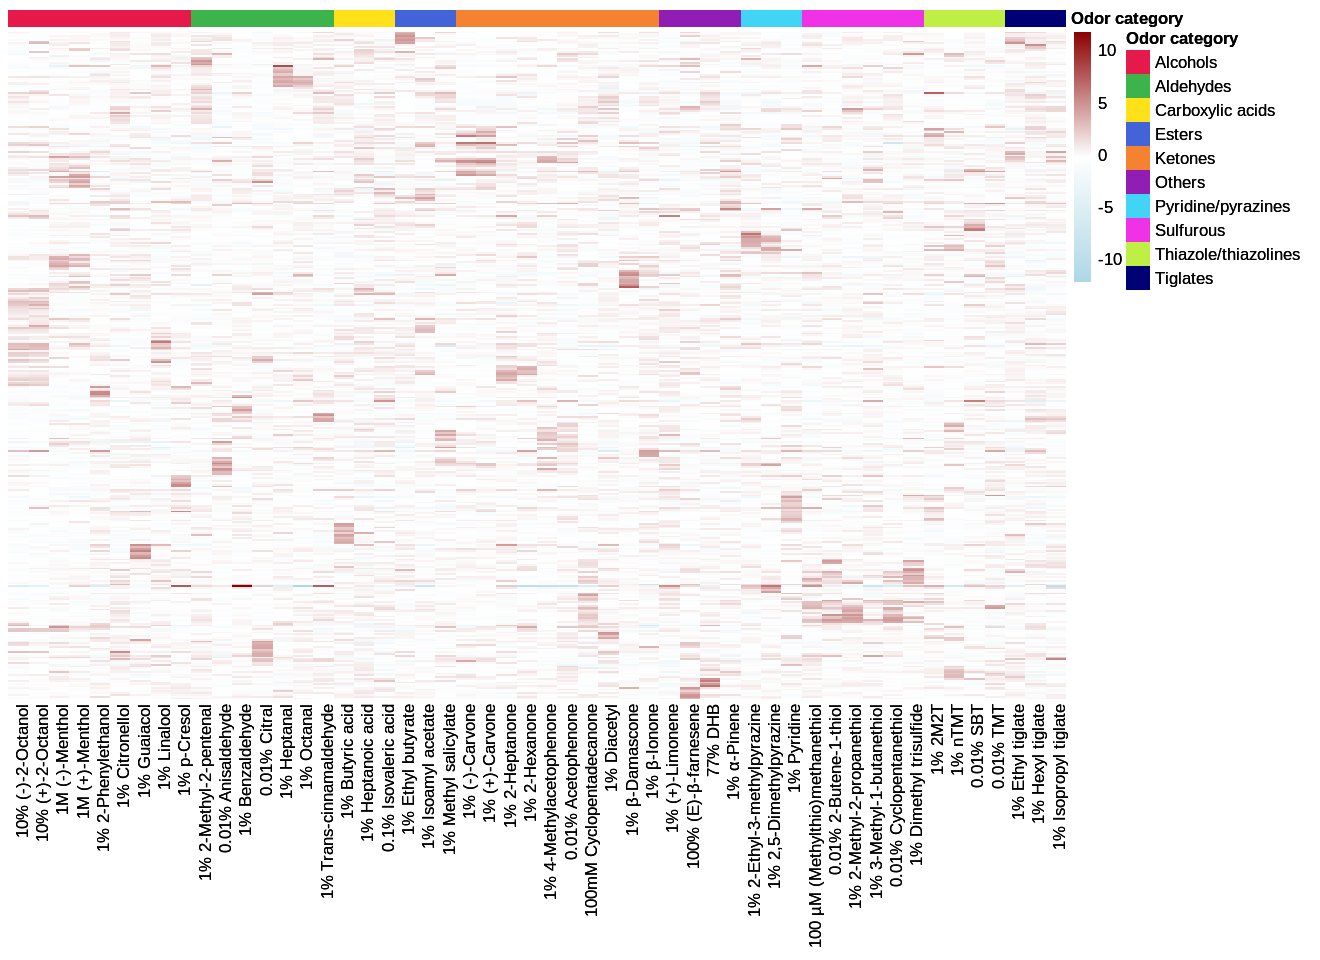

In [13]:
response_pheatmap <- pheatmap(odor_responses, border_color = NA, breaks = NULL,
                              cluster_cols=FALSE, color = colorRampPalette(c("light blue","white","dark red"))(5000),
                              treeheight_row = 0, treeheight_col = 0, show_rownames=FALSE,
                              clustering_distance_rows = "correlation",
                              #clustering_distance_cols = "correlation",
                              clustering_method = "complete",
                              annotation_colors = mycolors,
                              annotation_col = low_odor_info)

options(repr.plot.width=11, repr.plot.height=8)
response_pheatmap
#ggsave("./plots/fig_2a.pdf",response_pheatmap, width =11, height = 8)

# All data heatmap

In [14]:
all_odor_responses <- read.delim("./compiled_desc_resp/compiled_allOdor_sigResp_wide.csv", sep=',', header=T, row.names = 1)
all_odor_responses <- scale(all_odor_responses, center=TRUE, scale=TRUE)
all_cid_odorname_df <- read.delim("./cid_info/all_cid_odornames.csv", header=T, sep=',', row.names = 1)

In [15]:
colnames(all_odor_responses) <- all_cid_odorname_df$all_odor_list
all_cid_odorname_df$all_odor_group <- factor(all_cid_odorname_df$all_odor_group)

row.names(all_cid_odorname_df) <- all_cid_odorname_df$all_odor_list

allodor_info <- all_cid_odorname_df %>%
    arrange(all_odor_group, all_odor_name, all_conc_list) %>%
    select(all_odor_group)

row.names(allodor_info)[1:6] <- row.names(allodor_info)[c(1,4,2,5,3,6)]
colnames(allodor_info) <- "Odor category"

all_odor_responses <- all_odor_responses[,row.names(allodor_info)]

Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on '1% β-Damascone' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on '1% β-Damascone' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on '1% β-Ionone' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on '1% β-Ionone' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on '100% (E)-β-farnesene' in 'mbcsToSbcs': dot substituted for <ce>”
Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on '100% (E)-β-farnesene' in 'mbcsToSbcs': dot substituted for <b2>”
Warning message in strwidth(t, units = "in", c

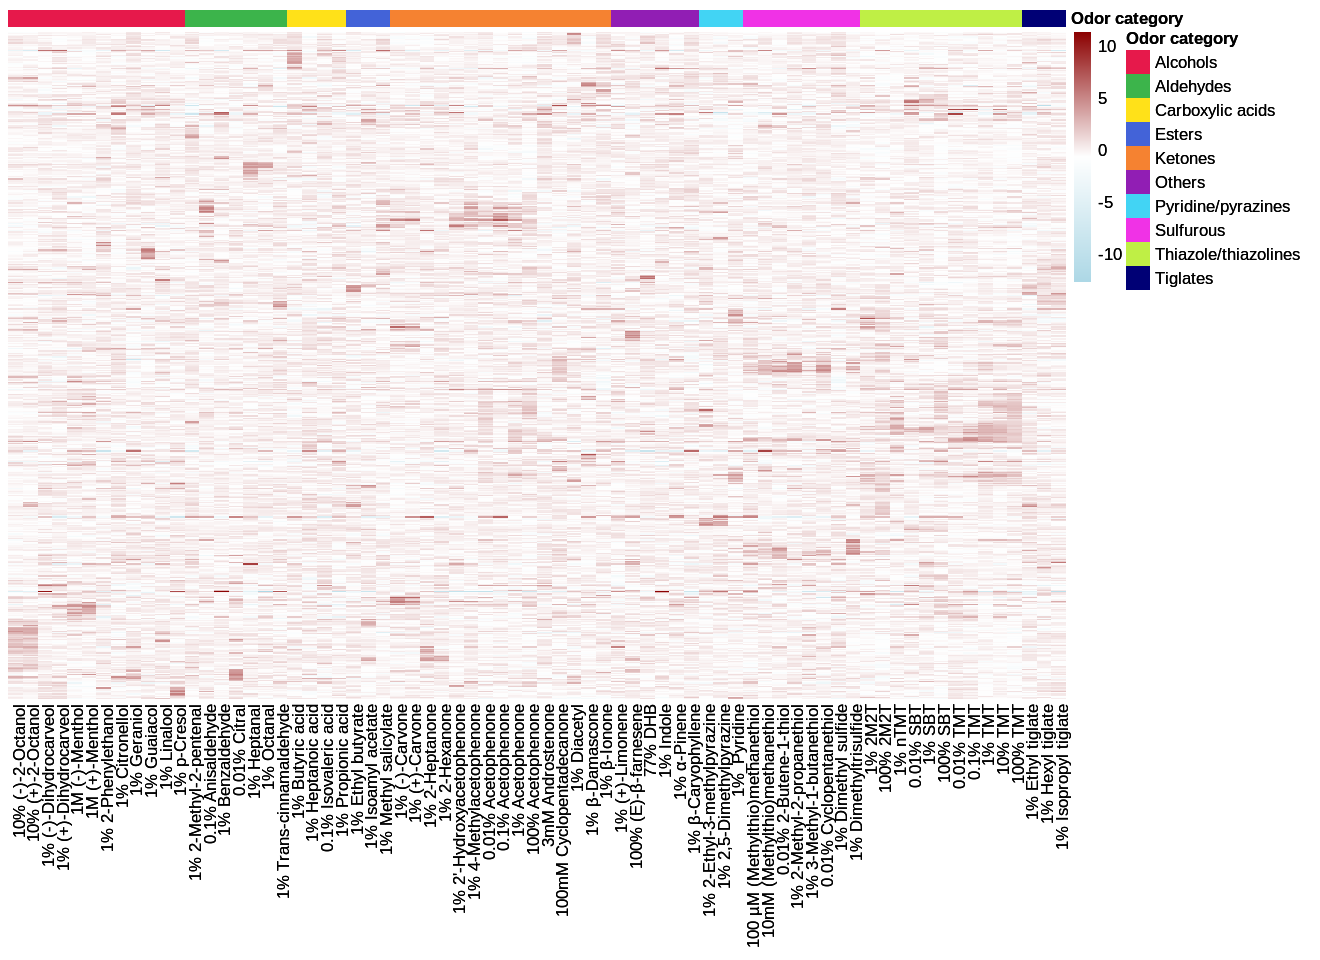

In [16]:
all_response_pheatmap <- pheatmap(all_odor_responses, border_color = NA, breaks = NULL,
                                  cluster_cols=FALSE, color = colorRampPalette(c("light blue","white","dark red"))(5000),
                                  treeheight_row = 0, treeheight_col = 0, show_rownames=FALSE,
                                  clustering_distance_rows = "correlation",
                                  #clustering_distance_cols = "correlation",
                                  clustering_method = "complete",
                                  annotation_colors = mycolors,
                                  annotation_col = allodor_info)

options(repr.plot.width=11, repr.plot.height=8)
all_response_pheatmap